# Sentiment Analysis: Deep Dive into Twitter Data

## Notebook 2: Word Vectorizations

In the vast world of Natural Language Processing (NLP), transforming textual data into a numerical format is a foundational step. This notebook delves deep into the vectorization aspect of the sentiment analysis project, turning raw tweet text into vectors that can be fed into machine learning algorithms.

The journey begins with the preparation of the dataset, splitting it into training and testing sets, ensuring a robust evaluation process. Following this, several vectorization techniques are explored, each with its unique approach and advantages:

**CountVectorizer**: A simple yet effective method that transforms the text into vectors based on word count.

**TF-IDF Vectorizer**: Going a step beyond mere counting, this method weighs terms based on their importance in the corpus, distinguishing between common and rare terms.

**Word2Vec**: A more advanced technique that captures the semantic meaning of words based on their context. Both Skip-Gram and CBOW models are explored to achieve this

Additionally, a Logistic classification model is trained and evaluated to set the base for guaging the performance of the various vectorization techniques.

## Importing libraries

In [3]:
# importing libraries

# importing libraries to interact with os and time
import os
import time
import warnings
warnings.filterwarnings('ignore')
import multiprocessing 

# import basic libraries for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import machine learning libraires
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import IncrementalPCA
from sklearn.maniforld import TSNE

# NLP libraries using nltk
import nltk
from nltk.tokenize import WhitespaceTokenizer

## Loading dataset 

We have already perfomed text pre-processing and cleaning the text in the pervious notebook 1, we will be importing the saved dataset from that notebook into the memory

In [4]:
# Loading the data
dataset = pd.read_csv("./Dataset/training_processed_data.csv")

dataset.sample(10)

target                                              text
342487        0   boh much homework i done everything next muhaha
410751        0                             cant come mexico city
476941        0                                 why dont know buy
761990        0                       business meeting going well
285990        0                                   link video work
796239        0            at doctor my heart hurting much lately
1139210       1      according the shawshank pacific ocean memory
650804        0                              know make feel quite
867298        1  problem o x aspire one sleep shut fan you window
800164        1                   where flower peter paul mary my

In [ ]:
# Checking for null values
dataset.isnull().sum()

target        0
text      27373
dtype: int64

In [5]:
# Dropping null values from the dataset
dataset.dropna(axis = 0, how = 'any', inplace = True)
dataset.isnull().sum()

target    0
text      0
dtype: int64

## Splitting the data into train and test dataset

Before training any machine learning model, it's essential to split the data into training and testing sets. This allows the model to be trained on a portion of the data and tested on an unseen part, ensuring a fair evaluation of performance.

In [7]:
# splitting the data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(dataset['text'], dataset['target'], test_size = 0.2, random_state = 42)
X_train.reset_index(drop = True)
y_train.reset_index(drop = True)

0          1
1          0
2          0
3          0
4          1
          ..
1258096    0
1258097    1
1258098    0
1258099    0
1258100    0
Name: target, Length: 1258101, dtype: int64

In [8]:
X_train

1365984    thing always chat watch simpson make prequel g...
9326       hardest album take itouch cause memory left ya...
696949                                      the baby sneezed
73985                                 dont think yoru bummma
1559981    im pretty thanks tired waiting sesh watch talk...
                                 ...                        
262841                                 i found one listening
1438696                excited teach prayer much appreciated
133696            well bruin celtic lost maybe next year boy
680785                                               ant are
123594                 kick as art fair last week end missed
Name: text, Length: 1258101, dtype: object

In [9]:
y_train

1365984    1
9326       0
696949     0
73985      0
1559981    1
          ..
262841     0
1438696    1
133696     0
680785     0
123594     0
Name: target, Length: 1258101, dtype: int64

## Logistic Classification and Evaluation function

**Logistic regression** offers a straightforward and effective approach to binary classification. In this section, we define functions to train the model and evaluate its performance.

In [10]:
# simple logistic classifier for testing and evaluating various vectorization techniques

def logistic_classifier(X_train, X_test, y_train, y_test):
    # start time of training model
    model_training_start_time = time.time()
    
    # Logistic regression model
    logistic_classifier = LogisticRegression(solver = 'lbfgs', max_iter = 500 )
    
    # fit the model to the dataset
    logistic_classifier.fit(X_train, y_train)
    
    # training end time
    model_train_end_time = time.time()

    print(f"Model is Trained. Training was completed in {model_train_end_time - model_training_start_time} secs ")
    
    # predicting on test data
    y_pred = logistic_classifier.predict(X_test)

    # Accuracy, precision, recall and f1_score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    report = classification_report(y_test, y_pred)

    print(f"Accuracy Score is {accuracy*100 :.2f}%")
    print(f"Precision Score is {precision*100 :.2f}% ")
    print(f"Recall Score is {recall*100 :.2f}%")
    print(f"F1_score is {f1*100 :.2f}%")
    print(report)
    
    return logistic_classifier, y_pred

# visualizing the confusion matrix
def con_matrix(y_test, y_pred):
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize = [10,10])
    ax = plt.subplot()
    hm = sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap="Blues", square=True);

    ax.set_xlabel('Predicted label');
    ax.set_ylabel('True label');
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['0', '1']);
    ax.yaxis.set_ticklabels(['0', '1']);
    plt.show

## Vectorization of the data using various method

In Natural Language Processing (NLP), raw textual data is inherently unstructured and cannot be directly fed into machine learning algorithms, which require numerical input. Vectorization bridges this gap by converting text into numerical vectors, representing the content and structure of the original data in a format that algorithms can understand and process. 

By doing so, vectorization unlocks the potential to derive meaningful insights and patterns from textual data.

### CountVectorizer

This is a simple method for vectorizing text data, part of the Bag of Words (BoW) approach. It transforms the text into vectors by counting the number of times each word appears in the text. This results in a sparse matrix where each row corresponds to a document and each column is a unique word from the entire corpus

Model is Trained. Training was completed in 17.843788385391235 secs 
Accuracy Score is 68.99%
Precision Score is 66.76% 
Recall Score is 75.61%
F1_score is 70.91%
              precision    recall  f1-score   support

           0       0.72      0.62      0.67    157277
           1       0.67      0.76      0.71    157249

    accuracy                           0.69    314526
   macro avg       0.69      0.69      0.69    314526
weighted avg       0.69      0.69      0.69    314526



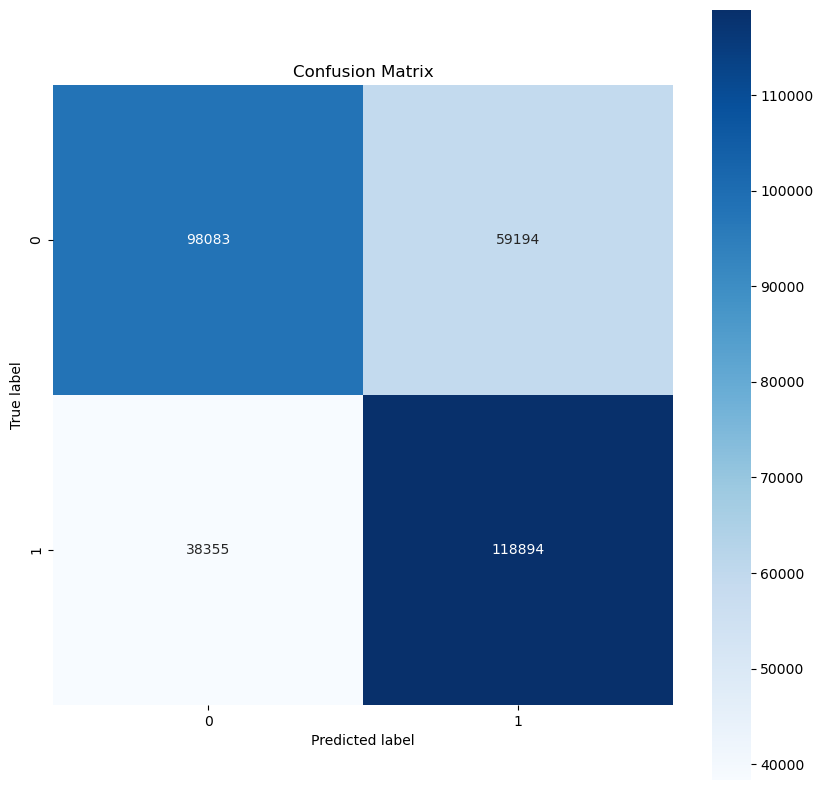

In [17]:
# iniitalize CountVectorizer
count_vect = CountVectorizer(max_features = 300)

# fit the CountVectorizer on the training and testing data
X_train_cv = count_vect.fit_transform(X_train)
X_test_cv = count_vect.transform(X_test)

# Train logistic Regression model on the vectorized data and make predictions
lr_cv, y_pred_cv = logistic_classifier(X_train_cv, X_test_cv, y_train, y_test)

# Visualize the confusion matrix
con_matrix(y_test,y_pred_cv)

### TFIDF Vectorizer

This method also transforms text into vectors, but it does so using the Term Frequency-Inverse Document Frequency (TF-IDF) weighting scheme. It calculates the frequency of each word in a document (Term Frequency), but then scales these counts based on how common the word is across all documents (Inverse Document Frequency). This helps to highlight words that are more unique to a document, giving them more weight than common words.

Model is Trained. Training was completed in 7.062480926513672 secs 
Accuracy Score is 69.02%
Precision Score is 67.39% 
Recall Score is 73.70%
F1_score is 70.40%
              precision    recall  f1-score   support

           0       0.71      0.64      0.67    157277
           1       0.67      0.74      0.70    157249

    accuracy                           0.69    314526
   macro avg       0.69      0.69      0.69    314526
weighted avg       0.69      0.69      0.69    314526



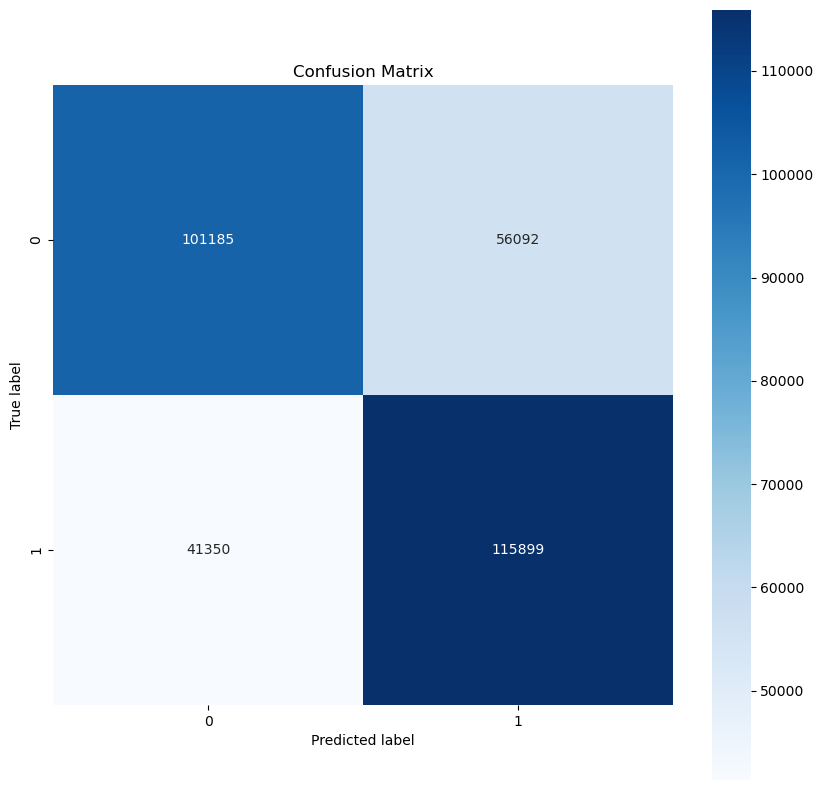

In [18]:
# initialize the TfidfVectorizer
tf_idf_vec = TfidfVectorizer(max_features = 300)

# Fit TfidfVectorizer on the training and testing data
X_train_tfidf = tf_idf_vec.fit_transform(X_train)
X_test_tfidf = tf_idf_vec.transform(X_test)

# Fit the logistic Regression model on the vectorized data and make predictions
lr_tfidf, y_pred_tfidf = logistic_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test)

# visualize the confusion matrix
con_matrix(y_test, y_pred_tfidf)


### Vectorization with Word2Vec: Training Skip-Gram and CBOW Models

Word2Vec is a groundbreaking technique in the realm of Natural Language Processing (NLP) that seeks to represent words as dense vectors in a continuous vector space. Unlike traditional methods that consider words in isolation, Word2Vec captures semantic relationships between words based on their context. This context-aware representation allows for capturing nuances like synonyms, antonyms, and even analogies.

There are two main architectures in Word2Vec:

<b>Skip-Gram</b>: This model predicts the context (surrounding words) given a target word. It works well with a small amount of data and captures rare words or phrases effectively.

<b>CBOW (Continuous Bag of Words)</b>: This model predicts the target word from its context. It's faster and has better representations for more frequent words compared to Skip-Gram

By training Word2Vec models, words with similar meanings tend to cluster together in the vector space, allowing for more accurate and nuanced natural language processing tasks..

In [ ]:
# main function for custom Word2Vec model

def train_w2v(dataset, skipgram = 0, size=300, window_size = 5, mc=25, a = 0.01, ma = 0.0001 ):
    
    # list to store the vocabulary
    vocab = []
    
    # Word2Vec model initialization
    model_w2v = Word2Vec(sg = skipgram, vector_size =size, window = window_size, min_count = mc, alpha = a, min_alpha = ma )
    
    # making tokens from the data
    text_tokens = [simple_preprocess(sent) for sent in dataset]
    
    # build the vocab of the model
    model_w2v.build_vocab(corpus_iterable=text_tokens)
    
    # model training for custom Word2Vec model
    model_w2v.train(corpus_iterable=text_tokens, total_examples = model_w2v.corpus_count, epochs = 50)
    
    return model_w2v

Let's strat the training of the custom CBOW Word2Vec model

In [ ]:
# Trianing CBOW Word2Vec model

# start time of model training
start_time = time.time()

# Custom CBOW_Word2Vec model
CBOW_Word2Vec = train_w2v(X_train)

# model training completion
print(f"CBOW Word2Vec model training completed. Training a CBOW Word2Vec model took {time.time()-start_time} sec")

CBOW Word2Vec model training completed. Training a CBOW Word2Vec model took 978.146666765213 sec


Let's train the custon Skip-gram Word2Vec model.

In [ ]:
# training Skip-gram Word2Vec model
start_time = time.time()

# Custom SKIP_Word2Vec mode
SKIP_Word2Vec = train_w2v(X_train,skipgram = 1)

# model training completion
print(f"Skipgram Word2Vec model training completed. Training a Skipgram Word2Vec model took {time.time()-start_time} sec")

Skipgram Word2Vec model training completed. Training a Skipgram Word2Vec model took 2294.3111855983734 sec


## Testing CBOW_Word2Vec and SKIP_Word2Vec model

It's very important to check how the each custom Word2Vec model is able to predict similar words from the vocabulary that we have created. For testing we are giving words like 'love' and 'hate' so that model is able to give us most similar words from the vocabulary.

In [ ]:
# most similar words in CBOW_Word2Vec
print("Similar for word for love in cbow model are")
display(CBOW_Word2Vec.wv.most_similar('love'))
print("\n similar word for hate in cbow model are")z
display(CBOW_Word2Vec.wv.most_similar("hate"))

Similar for word for love in cbow model are


[('adore', 0.5751129984855652),
 ('luv', 0.5695512294769287),
 ('loved', 0.551417350769043),
 ('looove', 0.4889848828315735),
 ('amazing', 0.48021405935287476),
 ('miss', 0.47171372175216675),
 ('lovee', 0.45606309175491333),
 ('awesome', 0.40858885645866394),
 ('loove', 0.397052139043808),
 ('sing', 0.38369739055633545)]


 similar word for hate in cbow model are


[('hating', 0.511319637298584),
 ('dislike', 0.5048902034759521),
 ('suck', 0.47351086139678955),
 ('stupid', 0.44128546118736267),
 ('ughh', 0.4373948872089386),
 ('ugh', 0.4170043468475342),
 ('scare', 0.4132777452468872),
 ('piss', 0.39960166811943054),
 ('despise', 0.393881618976593),
 ('annoying', 0.39265206456184387)]

In [ ]:
# most similar words in SKIP_Word2Vec
print("Similar for word for love in skip-gram model are")
display(SKIP_Word2Vec.wv.most_similar('love'))
print("\n similar word for hate in skip-gram model are")
display(SKIP_Word2Vec.wv.most_similar("hate"))

Similar for word for love in skip-gram model are


[('loved', 0.5722408294677734),
 ('luv', 0.5510874390602112),
 ('awesome', 0.5048098564147949),
 ('loving', 0.4945223033428192),
 ('miss', 0.4878405034542084),
 ('loveeeeeee', 0.4750784635543823),
 ('adore', 0.46554747223854065),
 ('amazing', 0.46473971009254456),
 ('lovee', 0.45398256182670593),
 ('adores', 0.4446992874145508)]


 similar word for hate in skip-gram model are


[('stupid', 0.48809435963630676),
 ('suck', 0.47696653008461),
 ('dislike', 0.43846020102500916),
 ('ugh', 0.4279372990131378),
 ('hating', 0.4236856997013092),
 ('hateee', 0.4094303548336029),
 ('uugh', 0.40595078468322754),
 ('damn', 0.4055382013320923),
 ('why', 0.39090707898139954),
 ('suckss', 0.3864312171936035)]

We can see that both the models that we have trained using CBOW and Skip-gram are fairly able to give similar words. Both the models have different words and probabilities defining the similarity between them. We have also shown the complete vobulary and how it can be seen in 2D dimensions below. 

## Vectorizing Twitter data with Word2Vec models

For further processing of the data we will have to first convert the data to vectors using tokenizer and our custom Word2Vec model i.e CBOW_Word2Vec and SKIP_Word2Vec.

In [ ]:
# initialize the Whitespacetokenizer
ws_tokenizer = tokenize.WhitespaceTokenizer()

def vectorizing (text, modelo):
    x = len(text)
    y = 300
    matrix = np.zeros((x,y))

    for i in range(x):
        words = ws_tokenizer.tokenize(text.iloc[i])

        for word in words:
            if word in modelo.wv:
                matrix[i] += modelo.wv.get_vector(word)
    return matrix

## Evaluation of CBOW and Skipgram Word2Vec models

### CBOW Word2Vec model evaluation

In [ ]:
# Vectorizing training and testing data using CBOW_Word2Vec
matrix_train_cbow = vectorizing(X_train, CBOW_Word2Vec)

matrix_test_cbow = vectorizing(X_test, CBOW_Word2Vec)

Model is Trained. Training was completed in 74.2281277179718 secs 
Accuracy Score is 73.53%
Precision Score is 72.38% 
Recall Score is 76.09%
F1_score is 74.19%
              precision    recall  f1-score   support

           0       0.75      0.71      0.73    157277
           1       0.72      0.76      0.74    157249

    accuracy                           0.74    314526
   macro avg       0.74      0.74      0.74    314526
weighted avg       0.74      0.74      0.74    314526



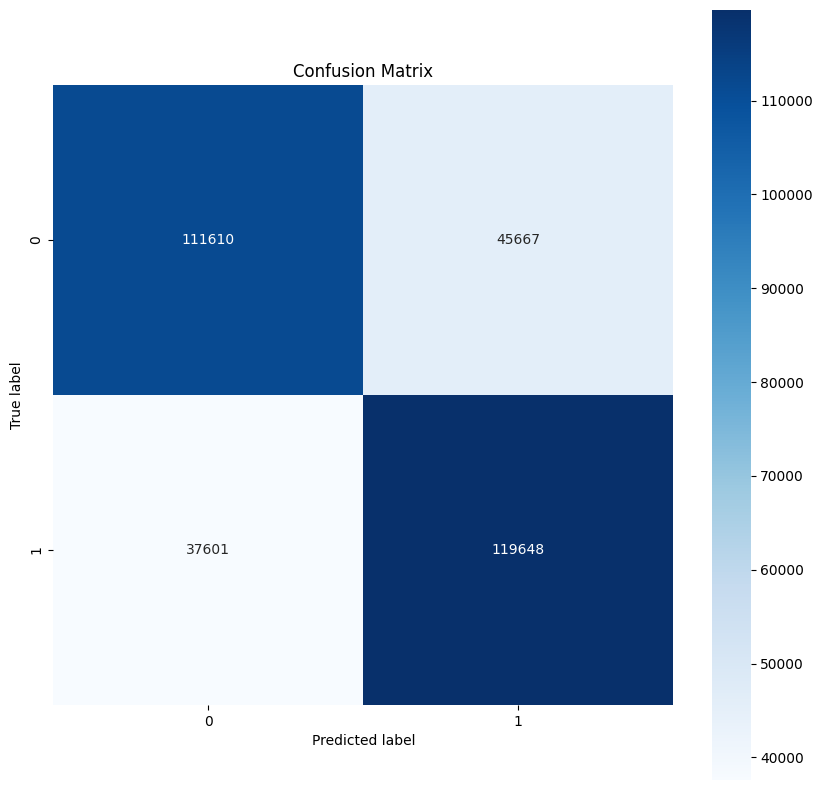

In [ ]:
# Fitting the training data from CBOW_Word2Vec to Logistic regression
lr_cbow, y_pred_cbow = logistic_classifier(matrix_train_cbow, matrix_test_cbow, y_train, y_test)

# CBOW_Word2Vec model performance evaluation
con_matrix(y_test, y_pred_cbow)

### Skipgram Word2Vec model evaluation

In [ ]:
# Vectorizing training and testing data using SKIP_Word2Vec
matrix_train_sg= vectorizing(X_train, SKIP_Word2Vec)

matrix_test_sg = vectorizing(X_test, SKIP_Word2Vec)

Model is Trained. Training was completed in 27.111263036727905 secs 
Accuracy Score is 72.87%
Precision Score is 71.99% 
Recall Score is 74.85%
F1_score is 73.39%
              precision    recall  f1-score   support

           0       0.74      0.71      0.72    157277
           1       0.72      0.75      0.73    157249

    accuracy                           0.73    314526
   macro avg       0.73      0.73      0.73    314526
weighted avg       0.73      0.73      0.73    314526



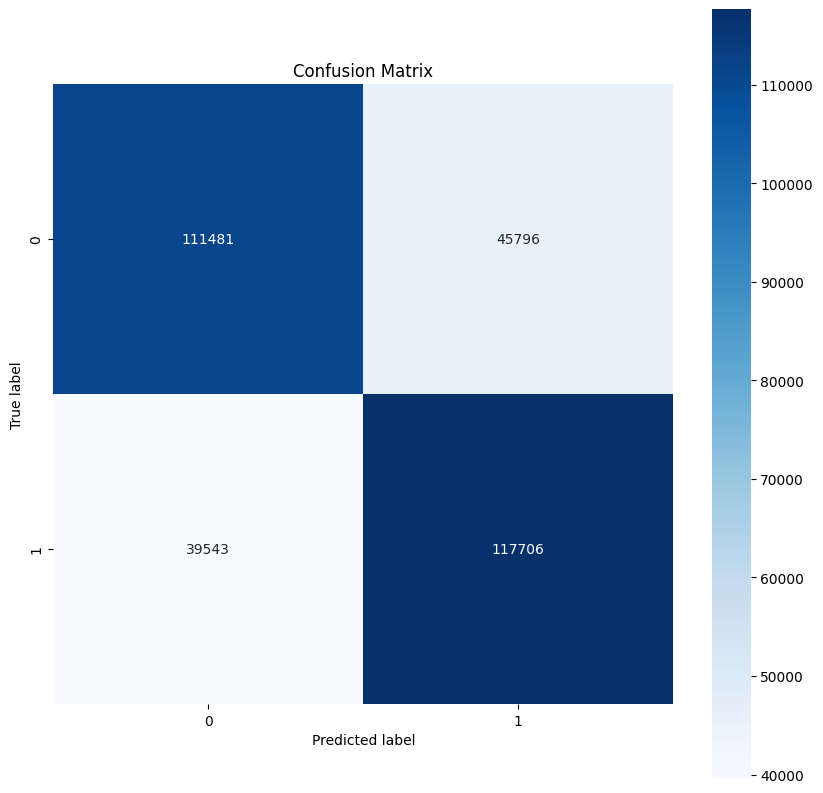

In [ ]:
# Training Logistic regression on Training data Vectorized using SKIP_Word2Vec
lr_sg, y_pred_sg = logistic_classifier(matrix_train_sg, matrix_test_sg, y_train, y_test)

# SKIP_Word2Vec model performance evaluation
con_matrix(y_test, y_pred_sg)

## Comparative Performance Analysis of Vectorization Methods¶

In the task of classifying tweet sentiments, different vectorization methods showcased varying degrees of effectiveness:

**CountVectorizer** and **TF-IDF Vectorizer**: Both methods exhibited comparable outcomes, with accuracy levels hovering around 68.99% and 69.0.2 respectively, precision at approximately 66% and 67% respectively, and F1 scores near 70%. Notably, the training phase for these techniques was swift, concluding in just about 4 to 5 seconds.

**Word2Vec (CBOW and Skip-Gram)**: These models clearly outperformed the previous methods. They achieved accuracy levels exceeding 73%, precision rates surpassing 72%, and F1 scores above 74%. Such results underscore their enhanced capability in discerning the sentiment behind tweets.

In summation, while the Word2Vec models demanded a more extended training period, the trade-off in performance was undoubtedly favorable. Their intricate design, which captures the contextual relationships between words, proves to be advantageous in sentiment analysis endeavors, especially when nuanced understanding is paramount.

## Training Word2Vec models on completed dataset

In [ ]:
# new training function for more accurate word2vec model

def train_w2v_1(dataset, skipgram = 0, size=300, window_size = 5, mc=20, a = 0.01, ma = 0.0001 ):
    
    
  # Initialize Word2Vec model
    model_w2v = Word2Vec(sg = skipgram,
                       vector_size =size,
                       window = window_size,
                       min_count = mc,
                       alpha = a,
                       min_alpha = ma,
                       workers = multiprocessing.cpu_count())

    text_tokens = [simple_preprocess(sent) for sent in dataset]

  # # Add special tokens in the vocabulary
  # text_tokens.append(["<unk>"])
  # text_tokens.append(["<pad>"])

  # Build vocabulory
    model_w2v.build_vocab(corpus_iterable=text_tokens)
  # Train the model
    model_w2v.train(corpus_iterable=text_tokens, total_examples = model_w2v.corpus_count, epochs = 50)

  # # set <unk> to zeros and <pad> to ones
  # model_w2v.wv['<unk>'] = np.zeros(size)
  # model_w2v.wv['<pad>'] = np.ones(size)

  return model_w2v

In [ ]:
# Trianing CBOW Model
start_time = time.time()

CBOW_Word2Vec = train_w2v_1(dataset['text'])

print(f"CBOW Word2Vec model training completed. Training a CBOW Word2Vec model took {time.time()-start_time} sec")

CBOW Word2Vec model training completed. Training a CBOW Word2Vec model took 1765.9286930561066 sec


In [ ]:
# Trainig Skip-gram model on complete dataset
start_time = time.time()

SKIP_Word2Vec = train_w2v_1(dataset['text'],skipgram = 1)

print(f"Skipgram Word2Vec model training completed. Training a Skipgram Word2Vec model took {time.time()-start_time} sec")

Skipgram Word2Vec model training completed. Training a Skipgram Word2Vec model took 2706.042008638382 sec


In [ ]:
# Saving the models
CBOW_Word2Vec.save("./Models/CBOW_Word2Vec.model")

SKIP_Word2Vec.save("./Models/SKIP_Word2Vec.model")

CBOW_Word2Vec and SKIP_Word2Vec models have been trained on the complete dataset for further processing and analysis of our project. Following section visualize the word vectors in 2-dimensions of each custom word2vec models.

## Visualizing the models

In [ ]:
def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)  # fixed-width numpy strings

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(100, 100))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))



In [ ]:
# reducing the dimensions from 300 to 2 for visualization
x_vals, y_vals, labels = reduce_dimensions(CBOW_Word2Vec)

# plot in 2 dimensionals
plot_with_matplotlib(x_vals, y_vals, labels)

In [ ]:
# reducing the dimensions from 300 dimensions to 2dimensions
x_vals, y_vals, labels = reduce_dimensions(SKIP_Word2Vec)

# 2Dimensional Visualization of Skipgram models
plot_with_matplotlib(x_vals, y_vals, labels)